In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
file_path = 'dataset/train.csv'
df = pd.read_csv(file_path)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
df.count()

id                    1458644
vendor_id             1458644
pickup_datetime       1458644
dropoff_datetime      1458644
passenger_count       1458644
pickup_longitude      1458644
pickup_latitude       1458644
dropoff_longitude     1458644
dropoff_latitude      1458644
store_and_fwd_flag    1458644
trip_duration         1458644
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
# Convert 'pickup_datetime' column to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_date'] = df['pickup_datetime'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 13

In [7]:
# Specify the desired date (change it to the date you are interested in)
desired_date = pd.to_datetime('2016-03-14').date()

In [8]:
same_day_data = df[df['pickup_date'] == desired_date]
same_day_data.count()

id                    8091
vendor_id             8091
pickup_datetime       8091
dropoff_datetime      8091
passenger_count       8091
pickup_longitude      8091
pickup_latitude       8091
dropoff_longitude     8091
dropoff_latitude      8091
store_and_fwd_flag    8091
trip_duration         8091
pickup_date           8091
dtype: int64

In [9]:
min_longitude = -74.02
max_longitude = -73.7
min_latitude = 40.7
max_latitude = 40.85

# Create boolean masks for filtering
longitude_mask = (df['pickup_longitude'] >= min_longitude) & (df['pickup_longitude'] <= max_longitude)
latitude_mask = (df['pickup_latitude'] >= min_latitude) & (df['pickup_latitude'] <= max_latitude)

# Apply both masks to get the final subset
filtered_df = df[longitude_mask & latitude_mask]
filtered_df['pickup_longitude'] = np.abs(filtered_df['pickup_longitude'])

/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_21976/3120676731.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pickup_longitude'] = np.abs(filtered_df['pickup_longitude'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


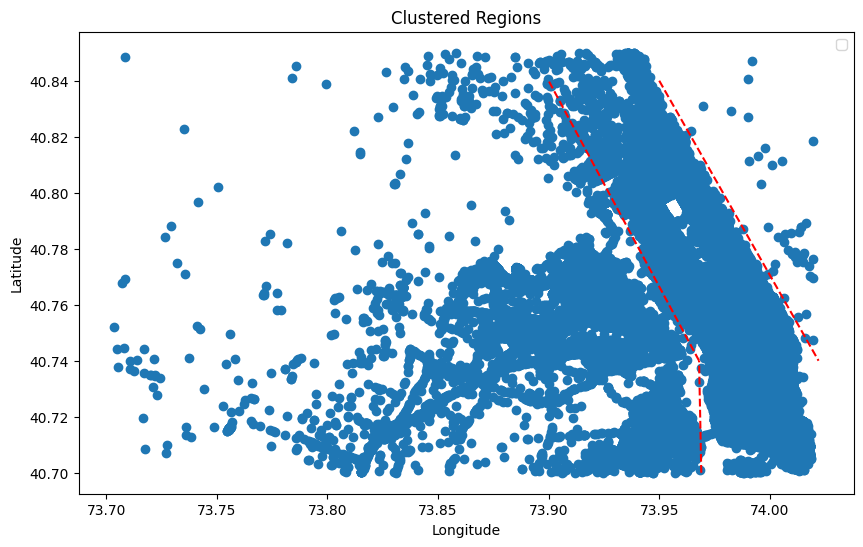

In [10]:

# Plot the clustered regions
plt.figure(figsize=(10, 6))

plt.scatter(filtered_df['pickup_longitude'], filtered_df['pickup_latitude'])
#plt.axvline(x=-73.968, color='red', linestyle='--')
x1, y1 = 73.968, 40.74
x2, y2 = 73.9, 40.84
x3, y3 = 73.969, 40.7
x4, y4 = 73.968, 40.74

x5, y5 = 73.95, 40.84
x6, y6 = 74.022, 40.74

plt.plot([x1, x2], [y1, y2], color='red', linestyle='--')
plt.plot([x3, x4], [y3, y4], color='red', linestyle='--')
plt.plot([x5, x6], [y5, y6], color='red', linestyle='--')
plt.title('Clustered Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [12]:
min(x1, x2, x3, x4)

73.9

In [51]:
filtered_df2 = filtered_df[
    #(filtered_df['pickup_longitude'] > min(x1, x2, x3, x4)) 
     ((filtered_df['pickup_longitude'] > x1) | ((x1 - x2 != 0) & (filtered_df['pickup_latitude'] > y2 + (y1 - y2) / (x1 - x2) * (filtered_df['pickup_longitude'] - x2)))) 
    &((filtered_df['pickup_longitude'] < x5) | ((x6 - x5 != 0) & (filtered_df['pickup_latitude'] < y5 + (y6 - y5) / (x6 - x5) * (filtered_df['pickup_longitude'] - x5))))
]
filtered_df2['pickup_longitude'] = -filtered_df2['pickup_longitude']

/var/folders/b6/t14lv28n5xqdhgq7zcrqwfkm0000gn/T/ipykernel_18827/2161708811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['pickup_longitude'] = -filtered_df2['pickup_longitude']


In [52]:
plt.clf()

<Figure size 640x480 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


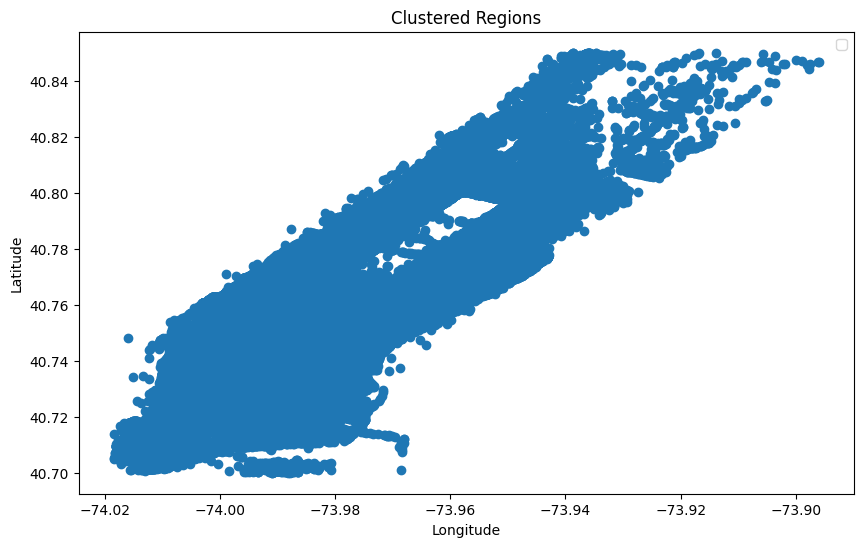

In [53]:
# Plot the clustered regions
plt.figure(figsize=(10, 6))

plt.scatter(filtered_df2['pickup_longitude'], filtered_df2['pickup_latitude'])
#plt.axvline(x=-73.968, color='red', linestyle='--')


#plt.plot([x1, x2], [y1, y2], color='red', linestyle='--')
#plt.plot([x3, x4], [y3, y4], color='red', linestyle='--')
plt.title('Clustered Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [54]:
filtered_df2.to_csv("dataset/filtered_train.csv")

In [55]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344802 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1344802 non-null  object        
 1   vendor_id           1344802 non-null  int64         
 2   pickup_datetime     1344802 non-null  datetime64[ns]
 3   dropoff_datetime    1344802 non-null  object        
 4   passenger_count     1344802 non-null  int64         
 5   pickup_longitude    1344802 non-null  float64       
 6   pickup_latitude     1344802 non-null  float64       
 7   dropoff_longitude   1344802 non-null  float64       
 8   dropoff_latitude    1344802 non-null  float64       
 9   store_and_fwd_flag  1344802 non-null  object        
 10  trip_duration       1344802 non-null  int64         
 11  pickup_date         1344802 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 133.4+ 

In [56]:
same_day_data = filtered_df2[filtered_df2['pickup_date'].isin([
                                                                pd.to_datetime('2016-03-14').date()
                                                               ,pd.to_datetime('2016-03-15').date()
                                                               #,pd.to_datetime('2016-03-16').date()
                                                               #,pd.to_datetime('2016-03-17').date()
                                                               ]
                                                               )]
same_day_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14812 entries, 0 to 1458541
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  14812 non-null  object        
 1   vendor_id           14812 non-null  int64         
 2   pickup_datetime     14812 non-null  datetime64[ns]
 3   dropoff_datetime    14812 non-null  object        
 4   passenger_count     14812 non-null  int64         
 5   pickup_longitude    14812 non-null  float64       
 6   pickup_latitude     14812 non-null  float64       
 7   dropoff_longitude   14812 non-null  float64       
 8   dropoff_latitude    14812 non-null  float64       
 9   store_and_fwd_flag  14812 non-null  object        
 10  trip_duration       14812 non-null  int64         
 11  pickup_date         14812 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


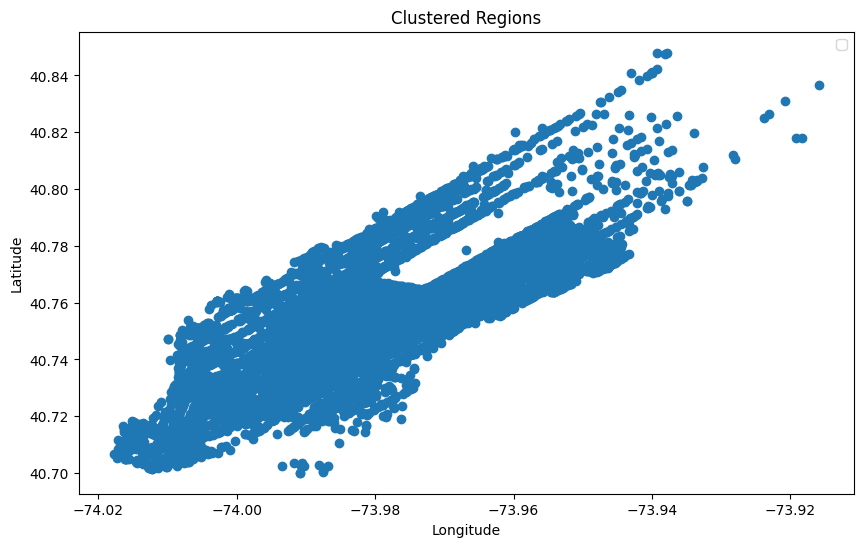

In [57]:
# Plot the clustered regions
plt.figure(figsize=(10, 6))

plt.scatter(same_day_data['pickup_longitude'], same_day_data['pickup_latitude'])
#plt.axvline(x=-73.968, color='red', linestyle='--')


#plt.plot([x1, x2], [y1, y2], color='red', linestyle='--')
#plt.plot([x3, x4], [y3, y4], color='red', linestyle='--')
plt.title('Clustered Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [58]:
same_day_data.to_csv("dataset/filtered_train_14_15.csv")